In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

In [8]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Disha Devatha\Downloads\churn_dataset.csv")

print("Dataset Info:")
data.info()

print("\nFirst Three Rows:")
print(data.head(3))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       636 non-null    int64  
 1   label                    614 non-null    object 
 2   sessions                 636 non-null    int64  
 3   drives                   636 non-null    int64  
 4   total_sessions           636 non-null    float64
 5   n_days_after_onboarding  627 non-null    float64
 6   total_navigations_fav1   636 non-null    int64  
 7   total_navigations_fav2   636 non-null    int64  
 8   driven_km_drives         627 non-null    float64
 9   duration_minutes_drives  636 non-null    float64
 10  activity_days            628 non-null    float64
 11  driving_days             636 non-null    int64  
 12  device                   636 non-null    object 
dtypes: float64(5), int64(6), object(2)
memory usage: 64.7+ KB

First T

In [10]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
ID                          0
label                      22
sessions                    0
drives                      0
total_sessions              0
n_days_after_onboarding     9
total_navigations_fav1      0
total_navigations_fav2      0
driven_km_drives            9
duration_minutes_drives     0
activity_days               8
driving_days                0
device                      0
dtype: int64


In [12]:
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical column
        data[column] = data[column].fillna(data[column].mode()[0])
    else:  # Numerical column
        data[column] = data[column].fillna(data[column].median())

In [13]:
print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values After Handling:
ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64


In [16]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

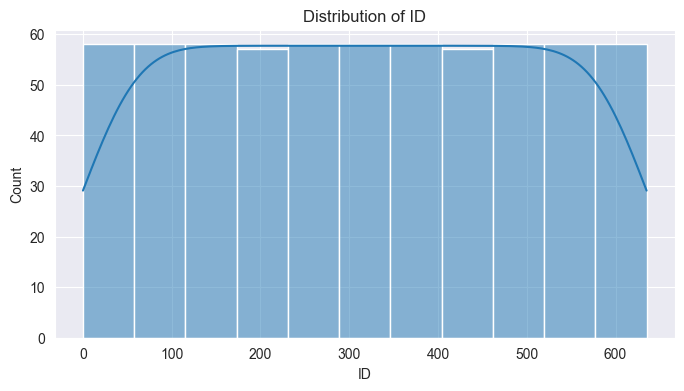

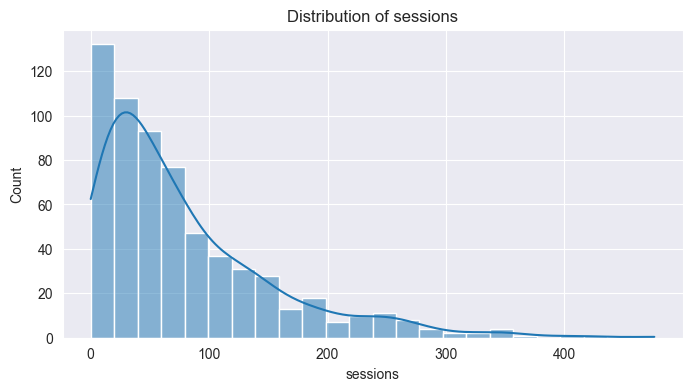

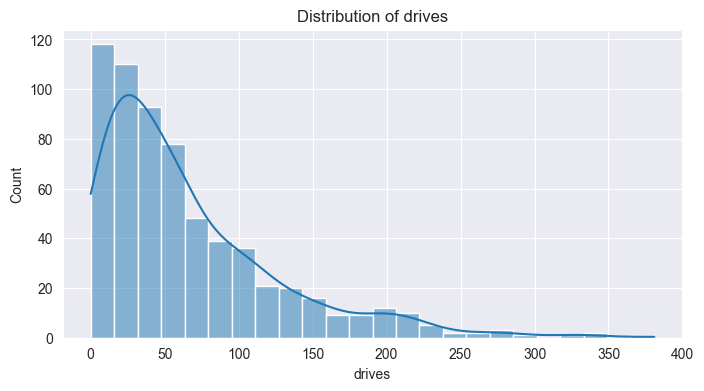

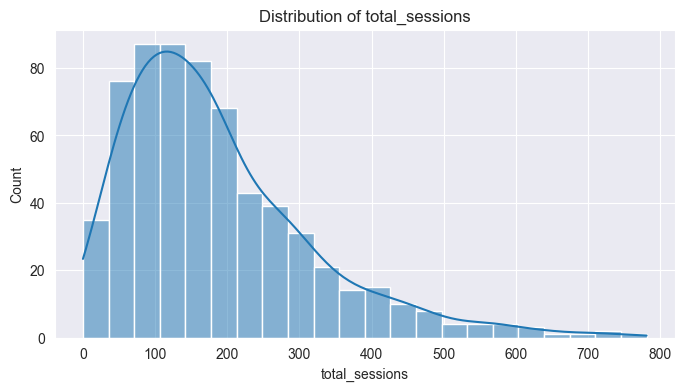

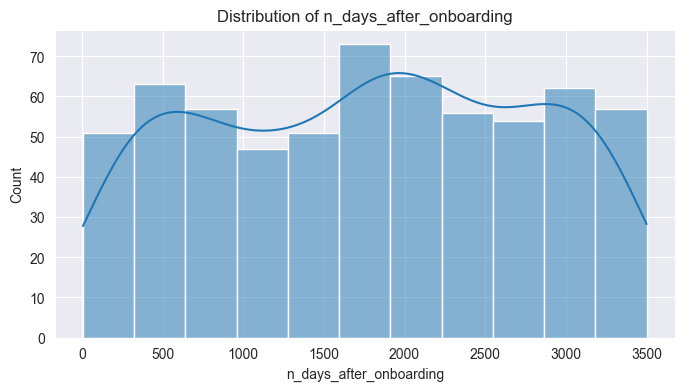

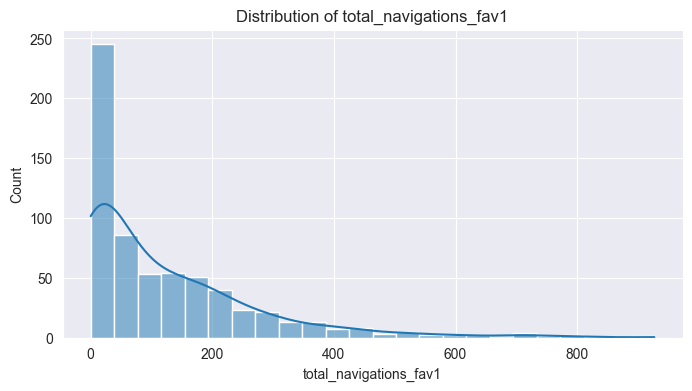

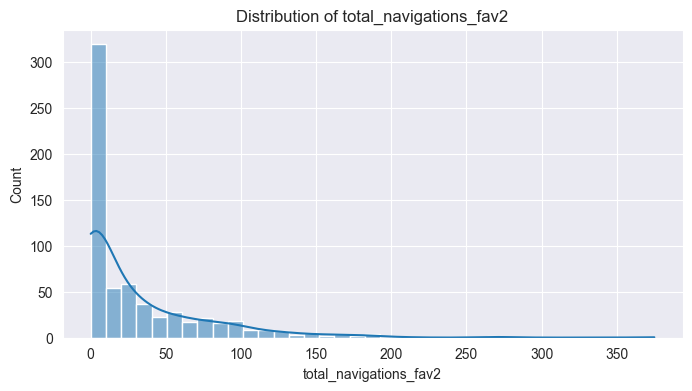

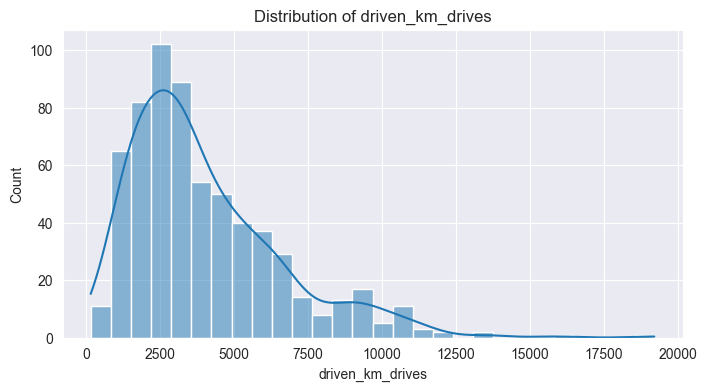

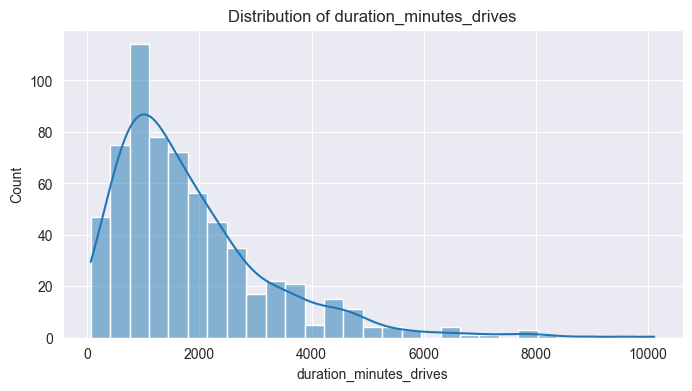

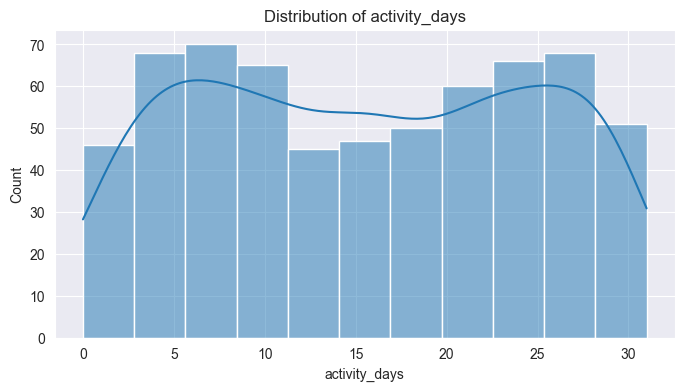

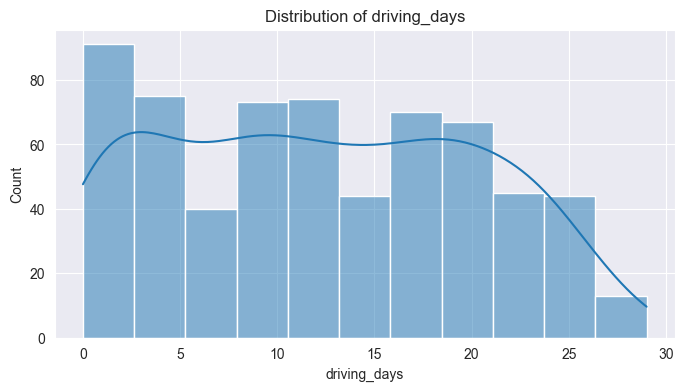

In [17]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

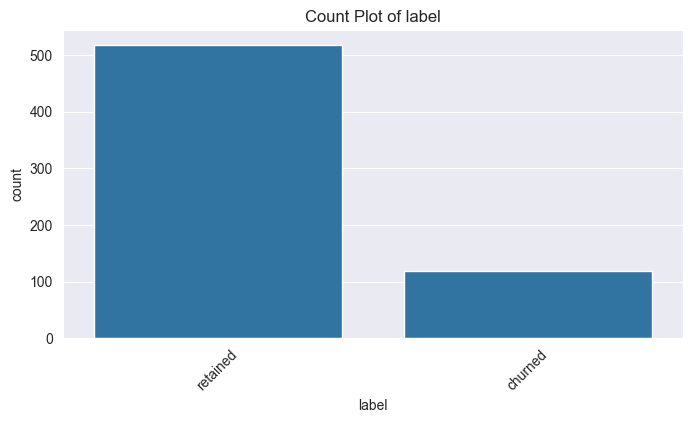

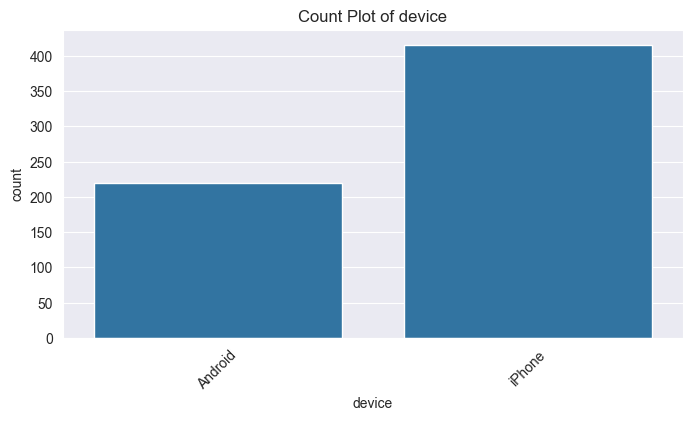

In [19]:
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=data)
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)
    plt.show()

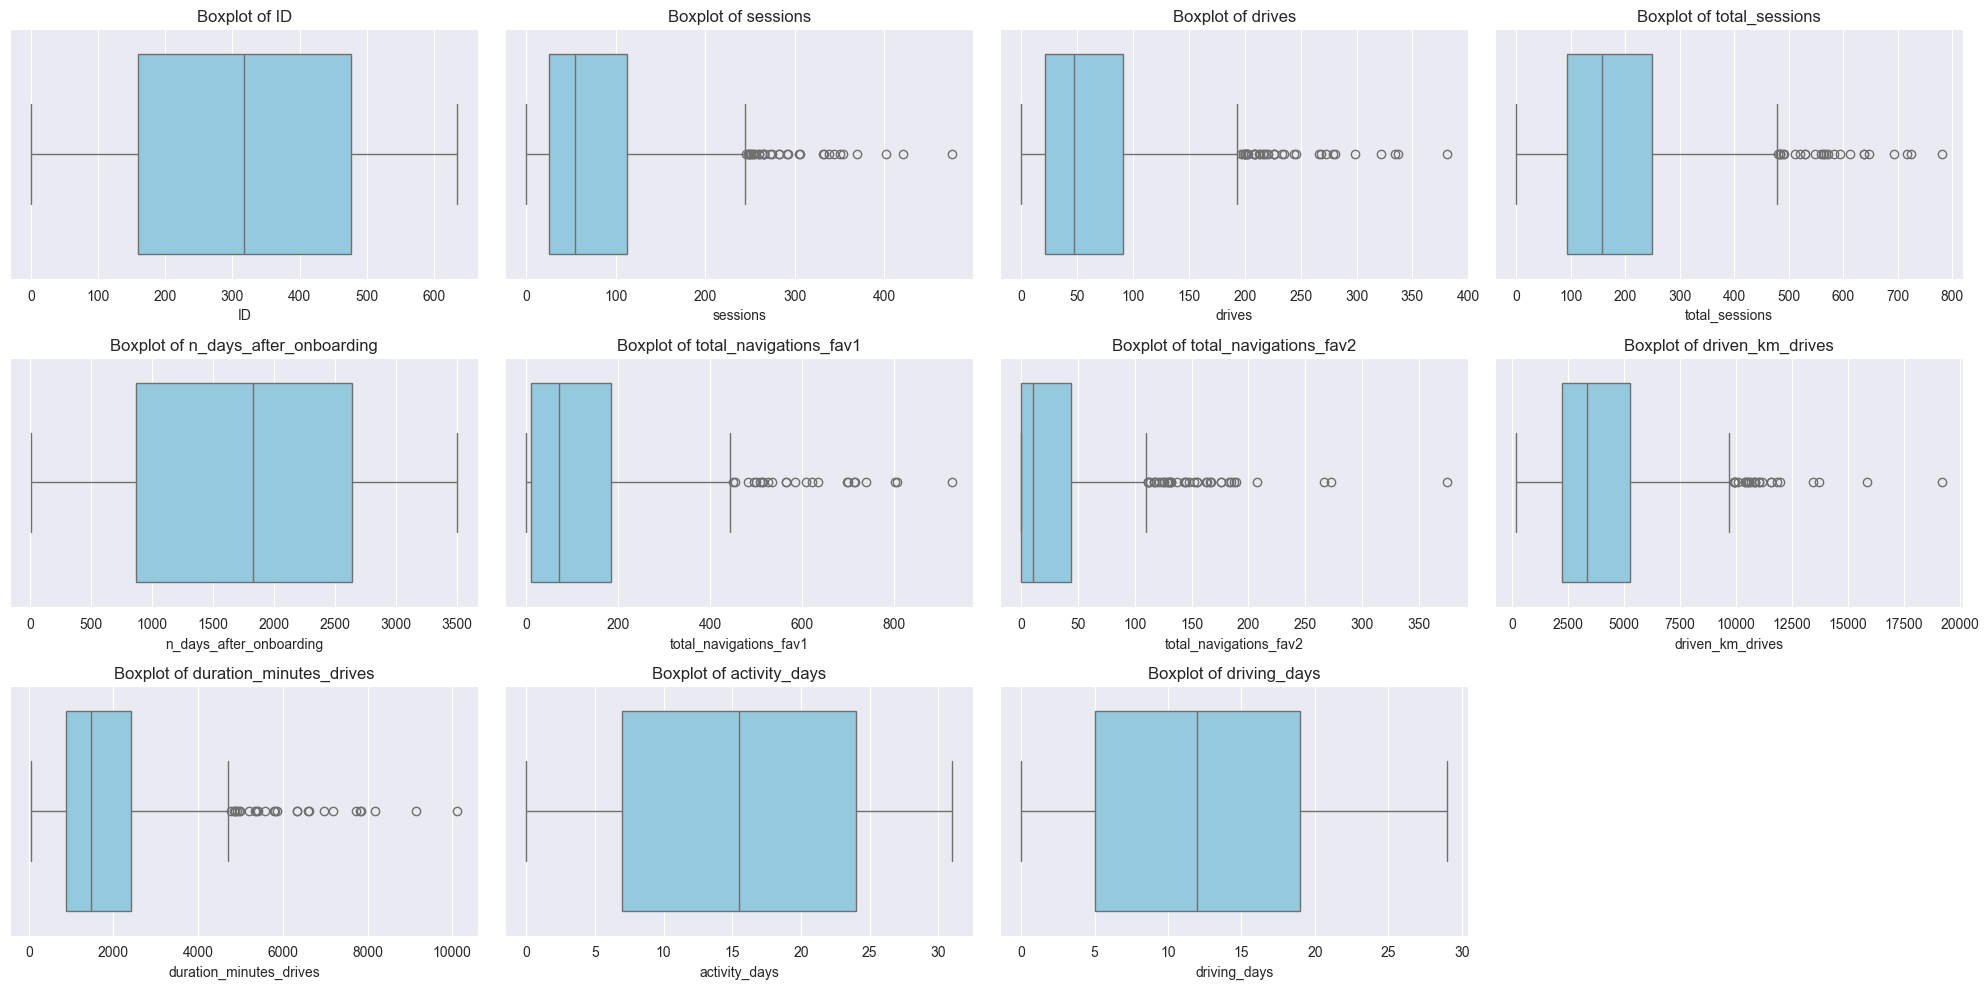

In [47]:
# Create boxplots for each numerical column
plt.figure(figsize=(20, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, (len(numerical_columns) + 2) // 3, i)  # Arrange plots in a grid
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

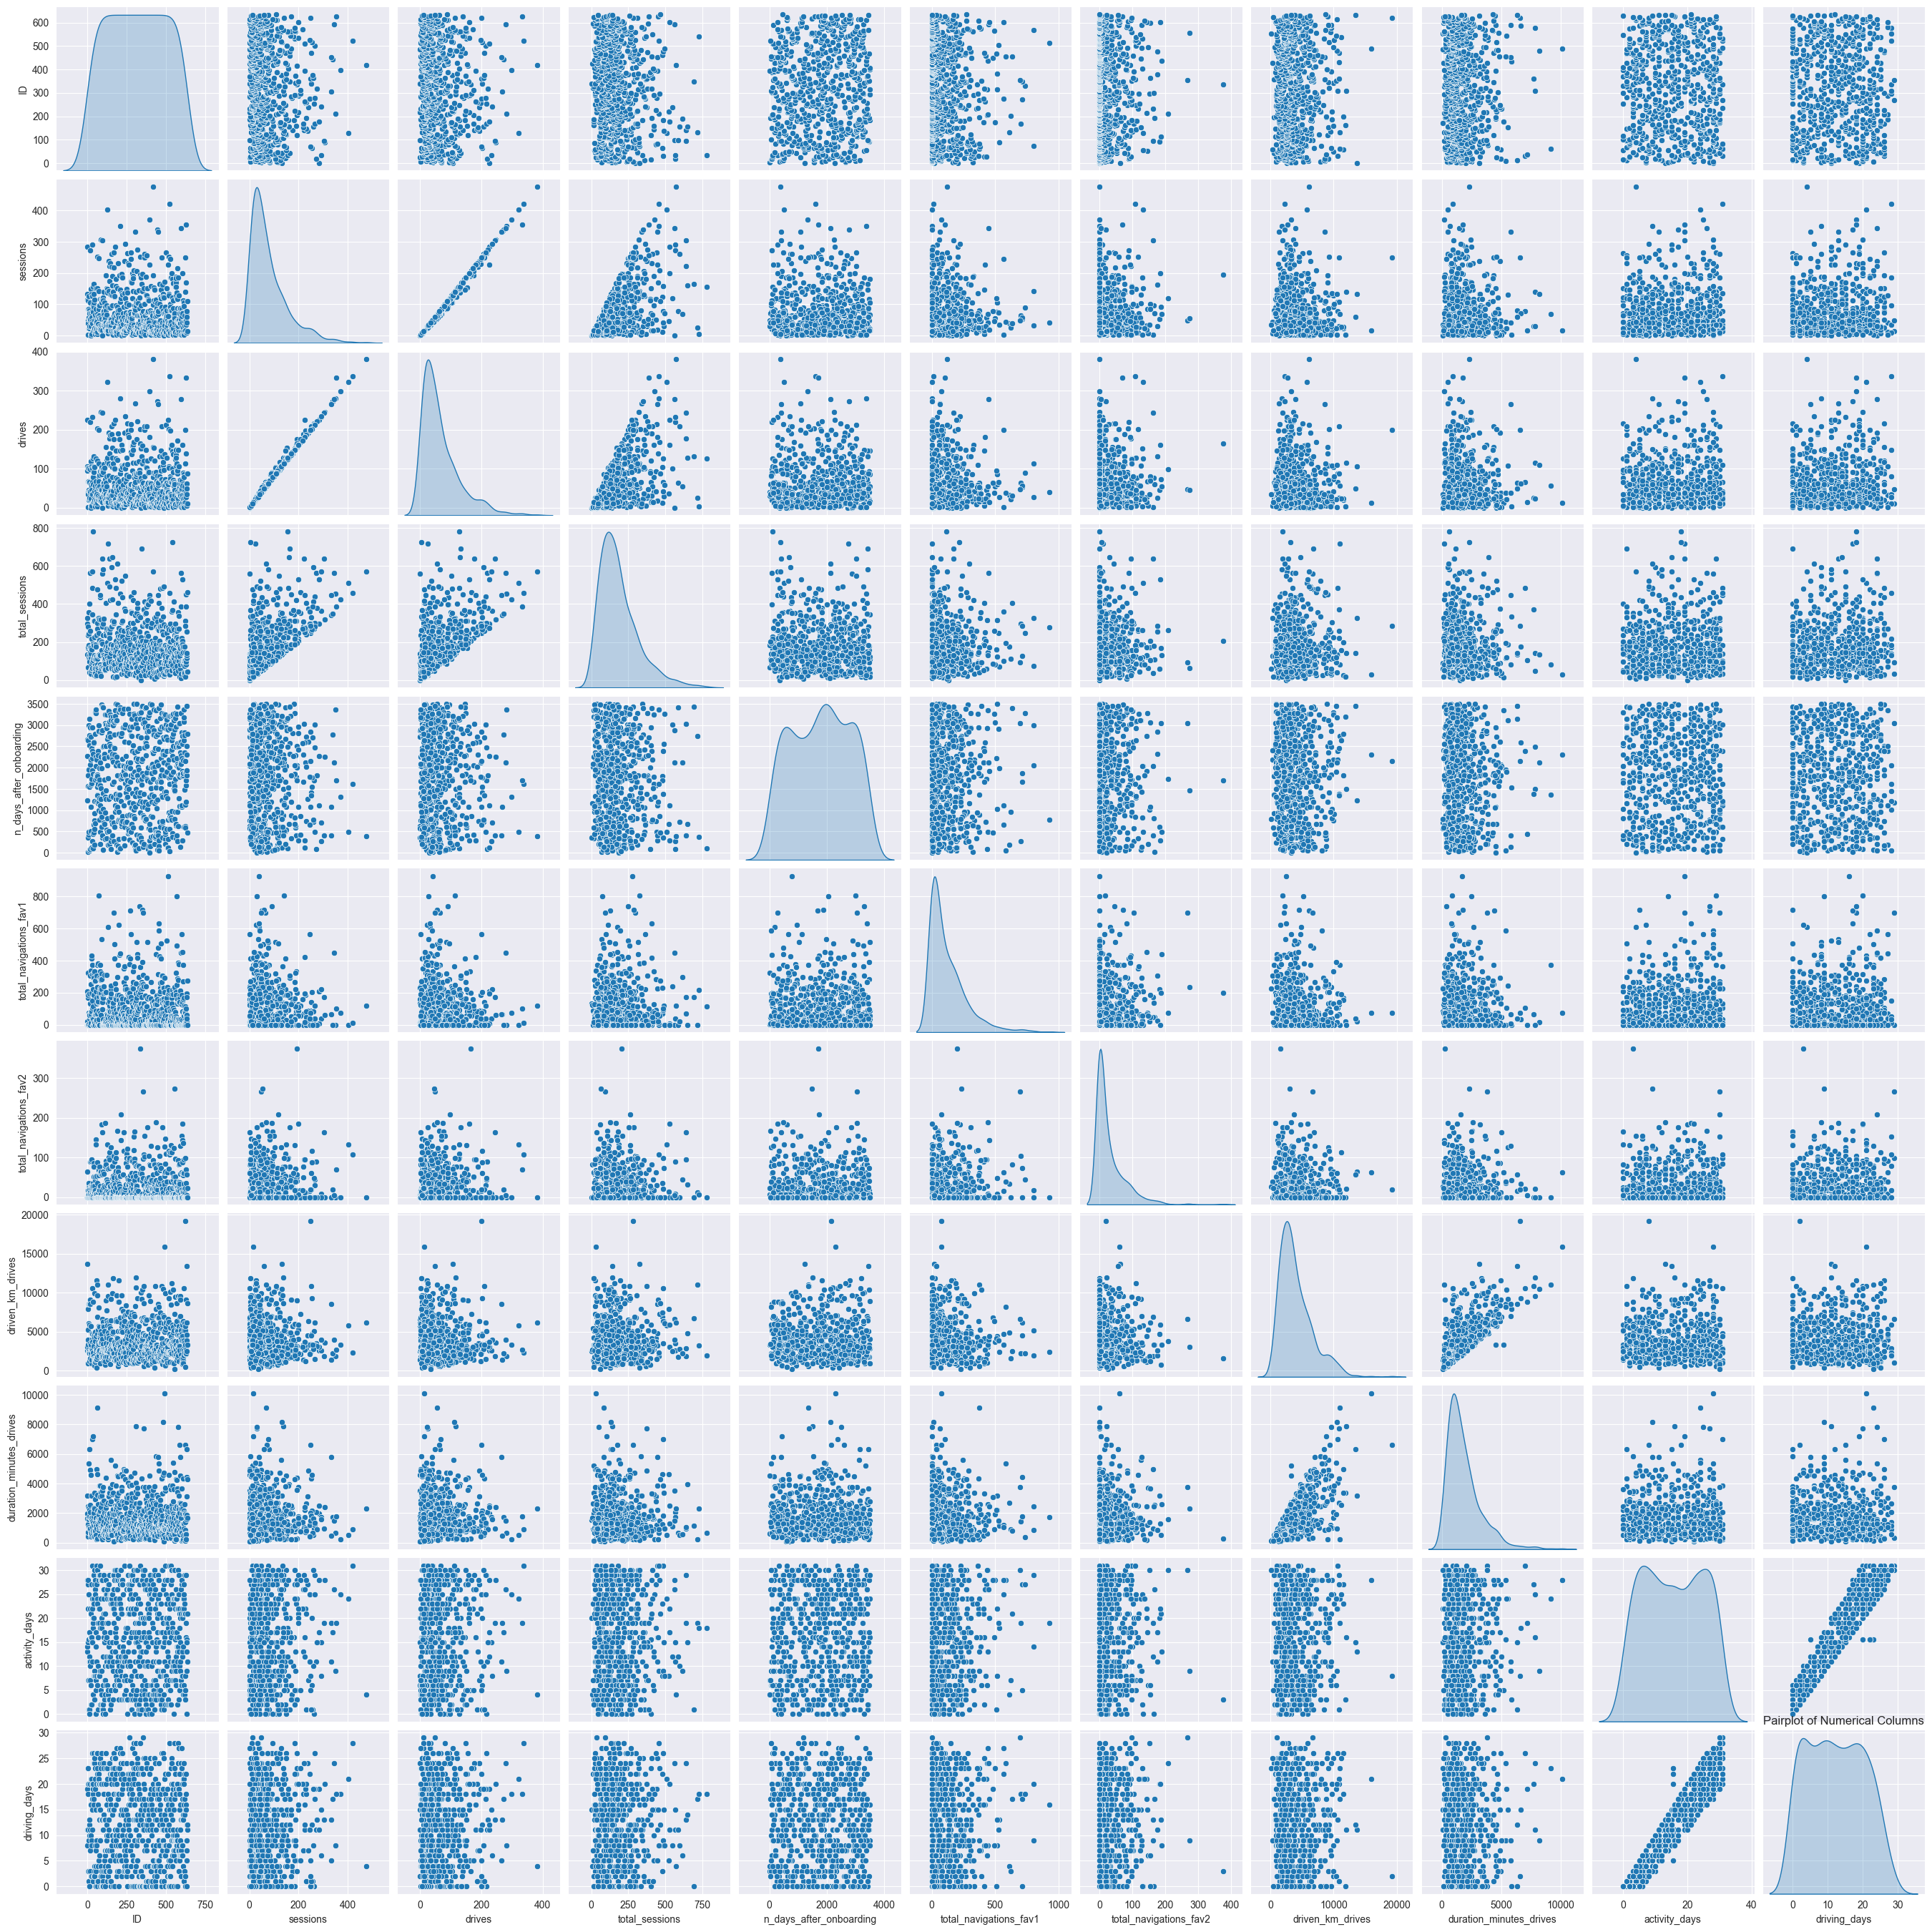

In [20]:
# Pairplot to check relationships
sns.pairplot(data[numerical_columns], diag_kind='kde')
plt.title("Pairplot of Numerical Columns")
plt.show()

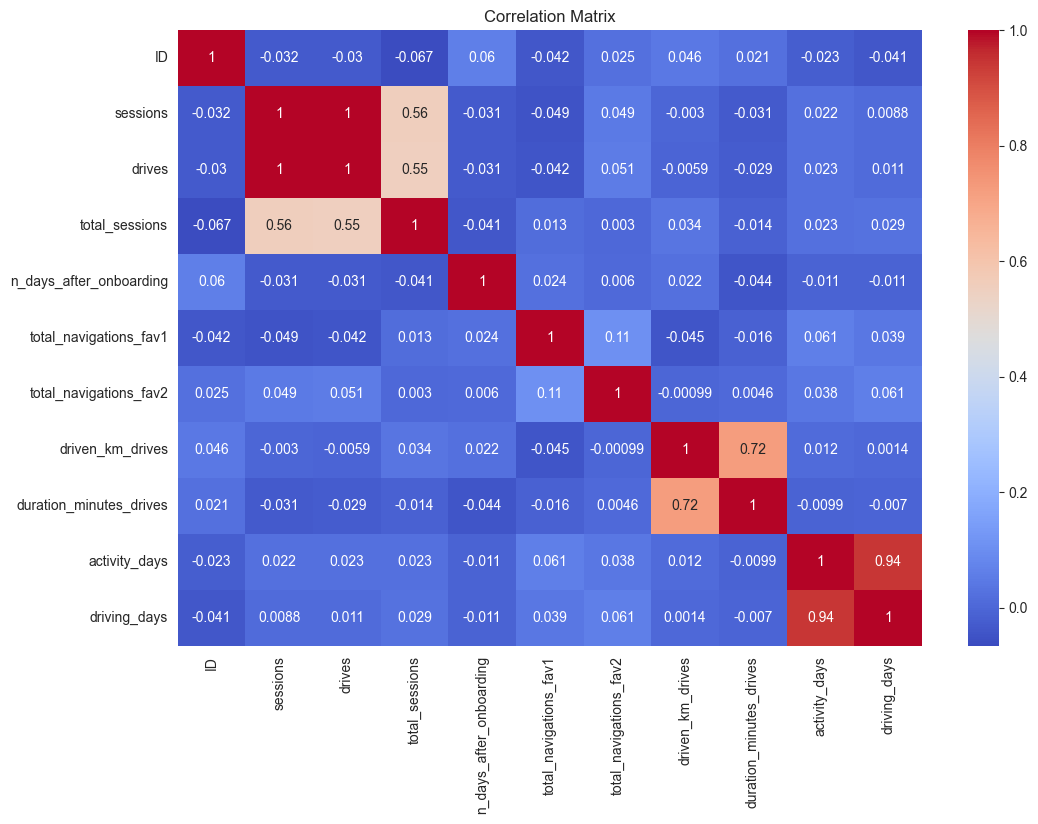

In [22]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [23]:
print("\nProcessed Data Summary:")
print(data.head())


Processed Data Summary:
   ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                   2276.0   
1   1  retained       133     107      326.896596                   1225.0   
2   2  retained       114      95      135.522926                   2651.0   
3   3  retained        49      40       67.589221                     15.0   
4   4  retained        84      68      168.247020                   1562.0   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7       3331.523048   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  
0           

In [25]:
# Handle categorical columns using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
#ML Algorithms

In [28]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

In [31]:
# Evaluate KNN
print("KNN Classifier Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_y_pred))
print("Classification Report:\n", classification_report(y_test, knn_y_pred))
print("Accuracy:", accuracy_score(y_test, knn_y_pred))

KNN Classifier Performance:
Confusion Matrix:
 [[  5  20]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.20      0.30        25
           1       0.83      0.97      0.90       103

    accuracy                           0.82       128
   macro avg       0.73      0.59      0.60       128
weighted avg       0.79      0.82      0.78       128

Accuracy: 0.8203125


In [30]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

In [32]:
# Evaluate Decision Tree
print("\nDecision Tree Classifier Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))
print("Classification Report:\n", classification_report(y_test, dt_y_pred))
print("Accuracy:", accuracy_score(y_test, dt_y_pred))


Decision Tree Classifier Performance:
Confusion Matrix:
 [[11 14]
 [16 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.44      0.42        25
           1       0.86      0.84      0.85       103

    accuracy                           0.77       128
   macro avg       0.63      0.64      0.64       128
weighted avg       0.77      0.77      0.77       128

Accuracy: 0.765625


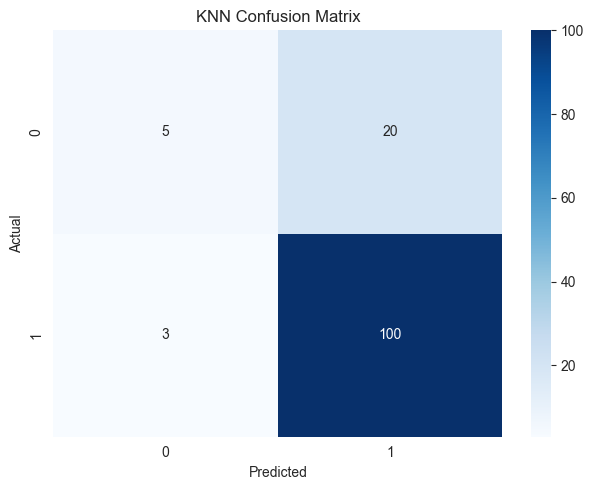

In [37]:
# Visualize Confusion Matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

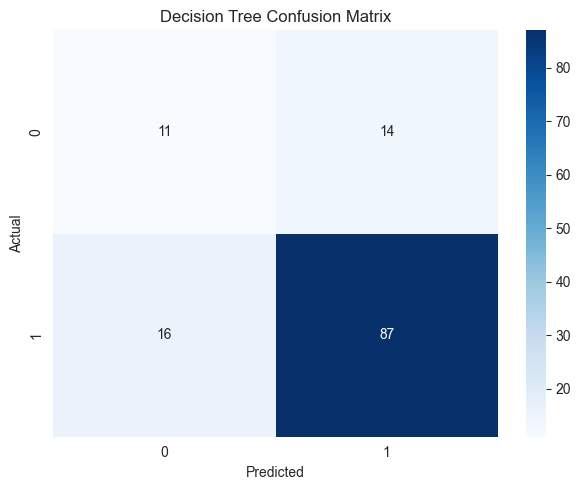

In [48]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [38]:
knn_accuracy = accuracy_score(y_test, knn_y_pred)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

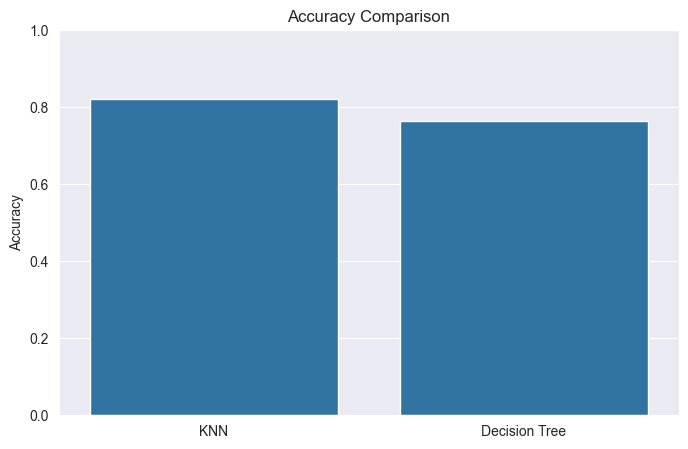

In [41]:
# Barplot for Accuracy Comparison
models = ['KNN', 'Decision Tree']
accuracies = [knn_accuracy, dt_accuracy]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

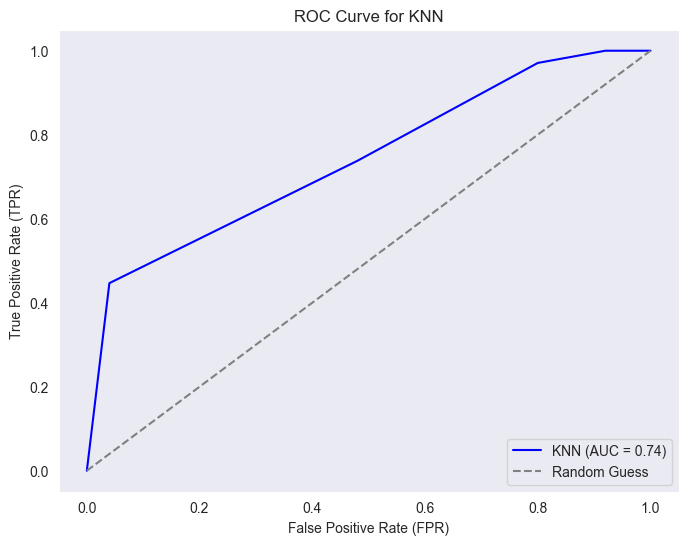

In [45]:
if len(set(y_test)) > 2:
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))
    knn_y_pred_proba = knn.predict_proba(X_test)
else:
    y_test_binarized = y_test
    knn_y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC for binary classification
fpr, tpr, thresholds = roc_curve(y_test_binarized, knn_y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"KNN (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.title("ROC Curve for KNN")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

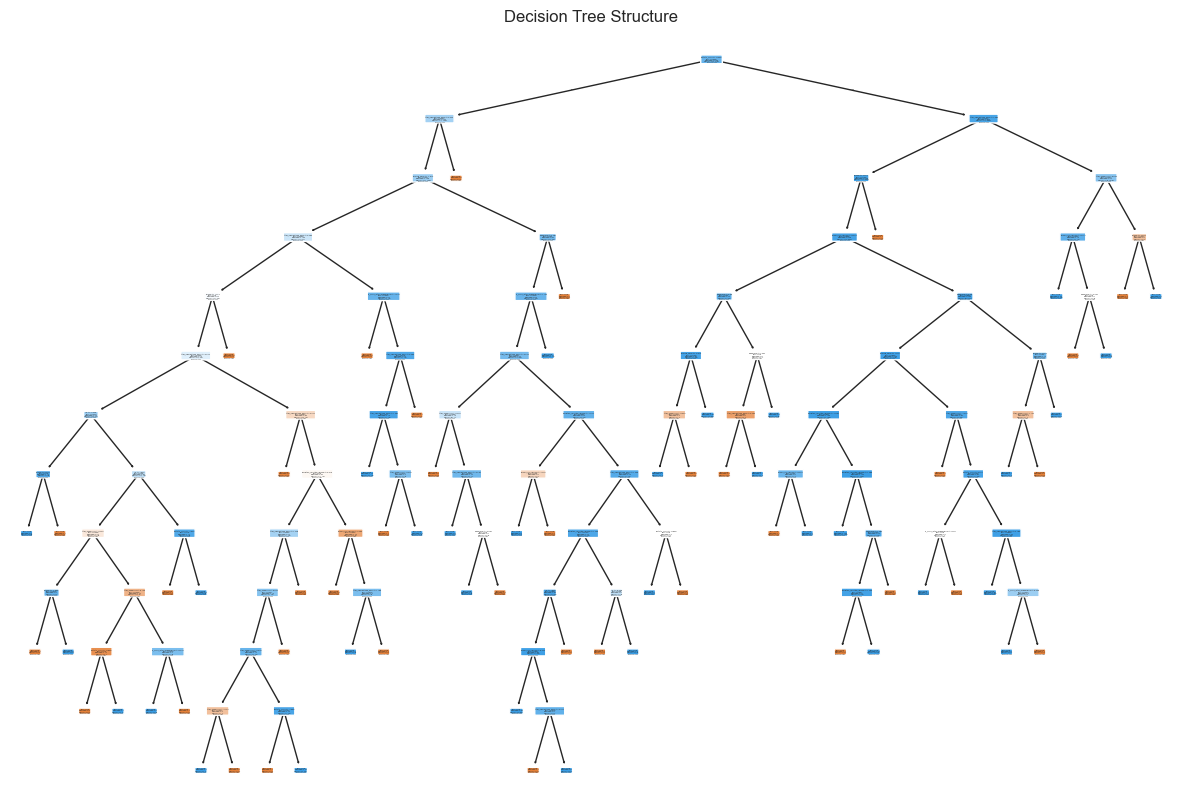

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()


In [ ]:
'''
ANALYSIS FOR KNN:
The KNN (K-Nearest Neighbors) classifier is a simple, non-parametric algorithm that performs well when the dataset has clearly defined clusters or boundaries. It classifies instances based on their proximity to other data points, making it effective for tasks with small, balanced, and scaled datasets. However, KNN can struggle with noisy data or irrelevant features, which can reduce its accuracy. Its reliance on distance calculations makes it computationally expensive, especially for larger datasets. Additionally, KNN is sensitive to imbalanced datasets, as majority voting can skew predictions toward the dominant class. Despite its simplicity, KNN is useful when computational resources are available, and the data has smooth decision boundaries.
'''

In [ ]:
'''
ANALYSIS FOR DECISION TREES:
The Decision Tree classifier is a highly interpretable algorithm that uses a hierarchical structure to split data into classes based on feature importance. It excels at capturing non-linear relationships and provides insights into the significance of individual features, making it valuable for understanding the decision-making process. However, Decision Trees are prone to overfitting, particularly if the tree is too deep or the dataset is noisy. This can be mitigated with techniques like pruning or setting a maximum tree depth. Compared to KNN, Decision Trees are computationally efficient once trained and are suitable for datasets where interpretability and non-linearity are critical. With proper tuning, Decision Trees can deliver robust performance across various scenarios.
'''